In [1]:
import pymongo
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017")

In [3]:
file = "dataset.csv"

In [4]:
db = client["Dataset_mongo"]

In [5]:
dataset = db['Dataset']

Function to find time differnence

In [6]:
import datetime
import dateutil.parser
def find_time_sec(ndate,udate):
    ndate = dateutil.parser.parse(ndate)
    udate = dateutil.parser.parse(udate)
    diff_time = ndate - udate
    diff = str(diff_time)
    time_lst = diff.split(':')
    sec = time_lst[2].split('.')
    x = diff.find('.')
    if x != -1:
        time_in_seconds = int(time_lst[0])*3600 + int(time_lst[1])*60 + int(sec[0]) + int(sec[1])/1000000
    else:
        time_in_seconds = int(time_lst[0])*3600 + int(time_lst[1])*60 + int(time_lst[2])
    return time_in_seconds

Inputs

In [7]:
start_time = '2021-03-23T04:20:16.500Z'
end_time = '2021-03-23T05:20:16.500Z'
main_program_signal = 'MainProgram_path1_OP20MAKINO_861'
signal_name = 'ServoLoad_2_path1_OP20MAKINO_861'
main_program = '//CNC_MEM/USER/LIBRARY/O2100'
machine_name = 'OP20MAKINO_861'

In [34]:
query = dataset.find({"$and":[{"updatedate":{"$gte":start_time}}, 
                            {"enddate":{"$lte":end_time}},
#                             {"signalname":{'$eq':main_program_signal}},
                            {"L1Name":{'$eq':machine_name}}
                           ]},
                  {"updatedate":1,"enddate":1,"timespan":1,"signalname":1,"value":1})
list_main_prog = list(query)
temp = pd.DataFrame(list_main_prog)

In [40]:
temp1 = temp.loc[temp['signalname'].str.contains('Servo', case = False)]
temp1['signalname'].value_counts()

ServoCurrentPer_2_path1_OP20MAKINO_861    110
ServoLoad_1_path1_OP20MAKINO_861          106
ServoLoad_2_path1_OP20MAKINO_861          105
ServoCurrent_2_path1_OP20MAKINO_861       103
ServoCurrentPer_1_path1_OP20MAKINO_861    101
ServoCurrentPer_0_path1_OP20MAKINO_861     96
ServoSpeed_2_path1_OP20MAKINO_861          93
ServoLoad_0_path1_OP20MAKINO_861           91
ServoCurrent_0_path1_OP20MAKINO_861        56
ServoLoad_0_path2_OP20MAKINO_861           56
ServoCurrentPer_0_path2_OP20MAKINO_861     55
ServoLoad_3_path2_OP20MAKINO_861           45
ServoCurrentPer_3_path2_OP20MAKINO_861     44
ServoSpeed_0_path1_OP20MAKINO_861          39
ServoSpeed_1_path1_OP20MAKINO_861          37
ServoCurrentPer_3_path1_OP20MAKINO_861     24
ServoLoad_3_path1_OP20MAKINO_861           22
ServoSpeed_0_path2_OP20MAKINO_861          22
ServoSpeed_3_path2_OP20MAKINO_861           9
ServoSpeed_3_path1_OP20MAKINO_861           7
ServoCurrent_0_path2_OP20MAKINO_861         5
ServoCurrent_3_path2_OP20MAKINO_86

Finding values of main program in given time

In [8]:
query = dataset.find({"$and":[{"updatedate":{"$gte":start_time}}, 
                            {"enddate":{"$lte":end_time}},
                            {"signalname":{'$eq':main_program_signal}},
                            {"L1Name":{'$eq':machine_name}}
                           ]},
                  {"updatedate":1,"enddate":1,"timespan":1,"signalname":1,"value":1})
list_main_prog = list(query)
main_prog = pd.DataFrame(list_main_prog)

In [32]:
main_prog.head(20)

ServoCurrentPer_2_path1_OP20MAKINO_861    110
AbsPos_2_path1_OP20MAKINO_861             109
ServoLoad_1_path1_OP20MAKINO_861          106
RelPos_2_path1_OP20MAKINO_861             105
McnPos_2_path1_OP20MAKINO_861             105
                                         ... 
OPERATE                                     1
MainProgram_path1_OP20MAKINO_861            1
SigOP_path1_OP20MAKINO_861                  1
RelPos_3_path2_OP20MAKINO_861               1
SigSTL_path1_OP20MAKINO_861                 1
Name: signalname, Length: 65, dtype: int64

In [10]:
main_prog['value'].value_counts()

//CNC_MEM/USER/LIBRARY/O2100    8
//CNC_MEM/USER/LIBRARY/O1000    7
Name: value, dtype: int64

Find range of signal value (+-30% dynamically)

In [11]:
group_signal = main_prog.groupby('value')
group = group_signal.get_group(main_program)
median_value = group['timespan'].median()
print(median_value)

303.0


In [12]:
upper_bound = median_value + (30 * median_value)/100
lower_bound = median_value - (30 * median_value)/100

print(upper_bound, lower_bound)

393.9 212.1


Finding values of signal in given time

In [13]:
query = dataset.find({"$and":[{"updatedate":{"$gte":start_time}}, #O2100
                            {"enddate":{"$lte":end_time}},
                            {"signalname":{'$eq':signal_name}},
                            {"L1Name":{'$eq':machine_name}}
                           ]},
                  {"updatedate":1,"enddate":1,"timespan":1,"signalname":1,"value":1})
list_signal = list(query)
signals = pd.DataFrame(list_signal)

In [14]:
signals.head()

,_id,updatedate,enddate,timespan,signalname,value
0,60596c8318e2863a9485bcce,2021-03-23T04:20:16.500Z,2021-03-23T04:20:18.500Z,2.0,ServoLoad_2_path1_OP20MAKINO_861,1.0
1,60596c8518e2863a9485be69,2021-03-23T04:20:18.500Z,2021-03-23T04:20:21.000Z,2.5,ServoLoad_2_path1_OP20MAKINO_861,13.0
2,60596c8a18e2863a9485c270,2021-03-23T04:20:21.000Z,2021-03-23T04:20:26.000Z,5.0,ServoLoad_2_path1_OP20MAKINO_861,0.0
3,60596c8c18e2863a9485c47e,2021-03-23T04:20:26.000Z,2021-03-23T04:20:28.000Z,2.0,ServoLoad_2_path1_OP20MAKINO_861,10.0
4,60596c8e18e2863a9485c696,2021-03-23T04:20:28.000Z,2021-03-23T04:20:30.000Z,2.0,ServoLoad_2_path1_OP20MAKINO_861,36.0


In [15]:
# print(signals['timespan'].max())
# print(signals['timespan'].min())

Function to plot data points

In [16]:
def plot_data():
    r = np.random.random()
    b = np.random.random()
    g = np.random.random()
    color = (r, g, b)
#     plt.figure(figsize=(8,6))
    axes.plot(time, cycle_data['ServoLoad_2_path1_OP20MAKINO_861'], color = color)
#     axes.legend()

Converting to cyclic

5


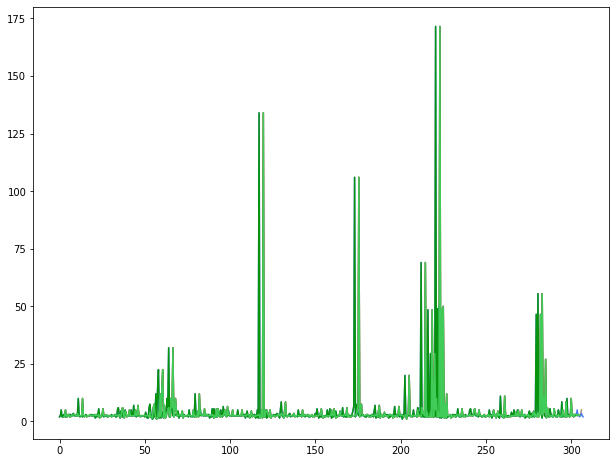

In [17]:
lst_sign = []
lst_sign.append(signal_name)
# print(lst_sign)
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([0, 0, 1, 1])
no_of_plots = 0
cycle_one = []
t = []
for i in range(len(main_prog)):
#     print(main_prog.iloc[i,5])
    if main_prog.iloc[i,5] == main_program and main_prog.iloc[i,3] > lower_bound and main_prog.iloc[i,3] < upper_bound: 
        start_time = main_prog.iloc[i,1]
        end_time = main_prog.iloc[i,2]
        index = signals[(signals['updatedate'] >= main_prog.iloc[i,1])].index.to_numpy()
#         print(signals.iloc[index[0],])

#         print(main_prog.iloc[i,3])
        time = np.arange(0,main_prog.iloc[i,3]+0.5,0.5)
        
        time = list(time)
        cycle_data = pd.DataFrame(columns = lst_sign,index = time)
#         time_diff = 0
        time_diff = find_time_sec(signals.iloc[index[0],1], main_prog.iloc[i,1])
        end = main_prog.iloc[i,3]
    #         print("/",end)
    #         print("*",time_diff)    
        
        if no_of_plots == 0:
            k = 0.0
            while k < time_diff:
                cycle_one.append(0)
                k += 0.5
        for j in range(len(signals)):
            if i!= 0:
                diff_in_cycles = find_time_sec(signals.iloc[i,1], signals.iloc[i-1,2]) 
            if diff_in_cycles != 0: #check if ther is gap between signals
                time_diff += diff_in_cycles 
            if time_diff <= end:
                cycle_data.at[time_diff,signal_name] = signals.iloc[j,3]
                time_diff += 0.5 
                if no_of_plots == 0:
                    cycle_one.append(signals.iloc[j,3])
                    t = np.arange(0,main_prog.iloc[i,3]+0.5,0.5)
#         print(cycle_data.head(10))
        cycle_data[signal_name] = cycle_data[signal_name].interpolate(method='linear') # updating missing values 
#         print(cycle_data.head(10))
        plot_data()
        no_of_plots += 1
print(no_of_plots)


In [19]:
print(len(cycle_one))
print(len(t))

613
613


Compute FFT on above data -> denoising

In [25]:
dt = 0.5
n = len(t)
fhat = np.fft.fft(cycle_one,n) # fhat -> fourier coeff complex values(magn & phase)
PSD = fhat * np.arange(n) #power spectral density..finding magn of vectors
freq = (1/(dt * n)) * np.arange(n) 
L = np.arange(1, np.floor(n/2), dtype = 'int')


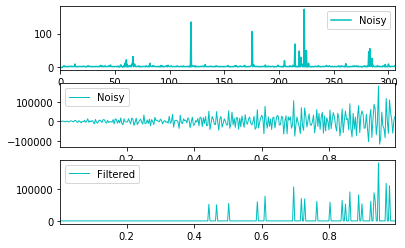

<Figure size 576x432 with 0 Axes>

In [27]:
indices = PSD > 50000
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

fig,axs = plt.subplots(3,1)
fig = plt.figure(figsize=(8,6))
plt.sca(axs[0])
plt.plot(t, cycle_one, color = 'c', LineWidth = 1.5, label = 'Noisy')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color = 'c', LineWidth = 1, label = 'Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSDclean[L], color = 'c', LineWidth = 1, label = 'Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()
plt.show()